In [18]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json
import squarify

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Download the MICROBIOLOGYEVENTS csv file
csv_file_path = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/MICROBIOLOGYEVENTS.csv'

# Load the downloaded file into a pandas DataFrame
microbiologyevents = pd.read_csv(csv_file_path)

In [4]:
microbiologyevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


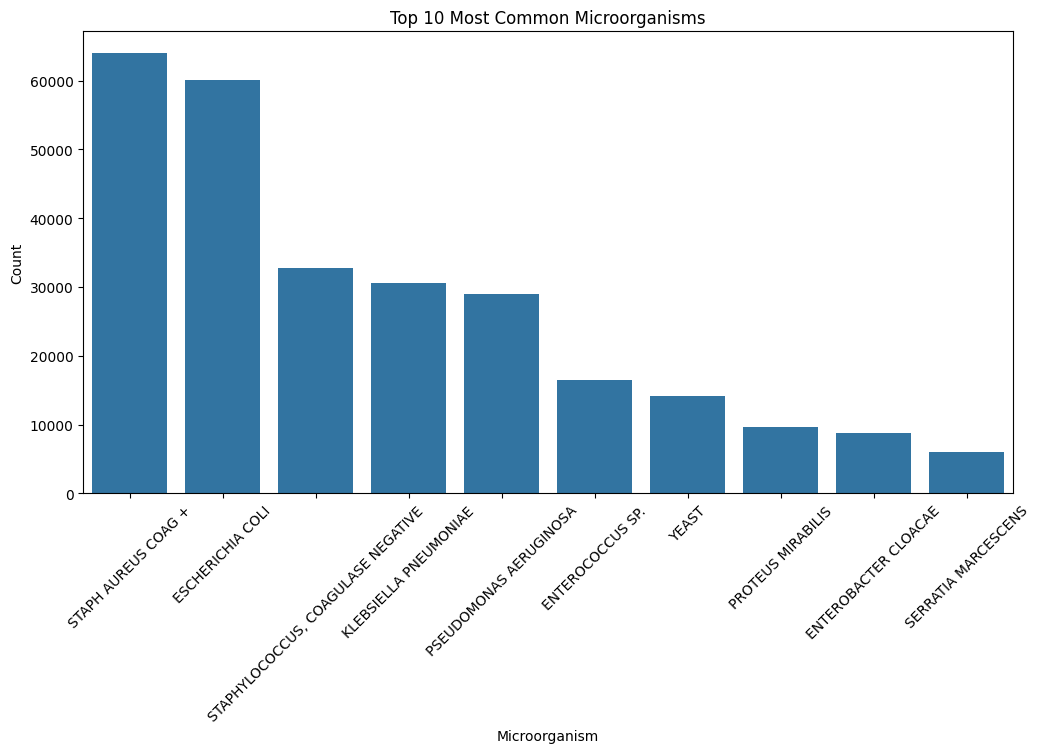

In [5]:
# Count the number of occurrences of each microorganism
microorganism_counts = microbiologyevents['ORG_NAME'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=microorganism_counts.index, y=microorganism_counts.values)
plt.title('Top 10 Most Common Microorganisms')
plt.xlabel('Microorganism')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

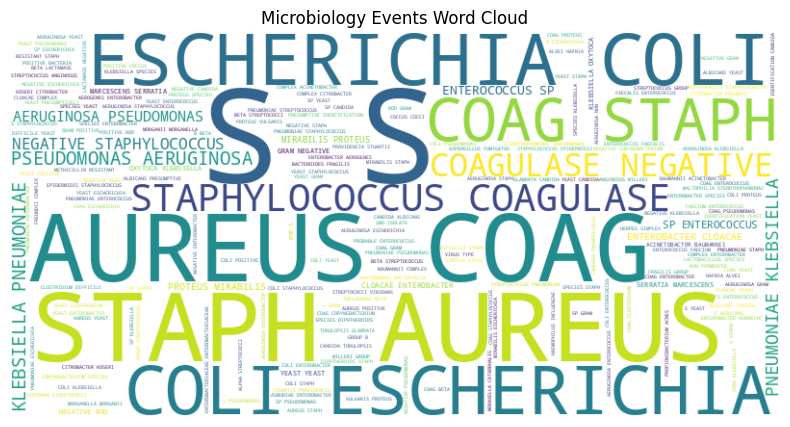

In [6]:
from wordcloud import WordCloud

# Combine the organism and interpretation columns to form the text data for the word cloud
text_data = microbiologyevents['ORG_NAME'].dropna().tolist() + microbiologyevents['INTERPRETATION'].dropna().tolist()

# Join all text data into a single string
text = ' '.join(text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Microbiology Events Word Cloud')
plt.show()

In [7]:
# Download the PROCEDUREEVENTS_MV csv file
csv_file_path = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/PROCEDUREEVENTS_MV.csv'

# Load the downloaded file into a pandas DataFrame
procedureevents_mv = pd.read_csv(csv_file_path)

In [ ]:
procedureevents_mv.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,NaN,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,NaN,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,NaN,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


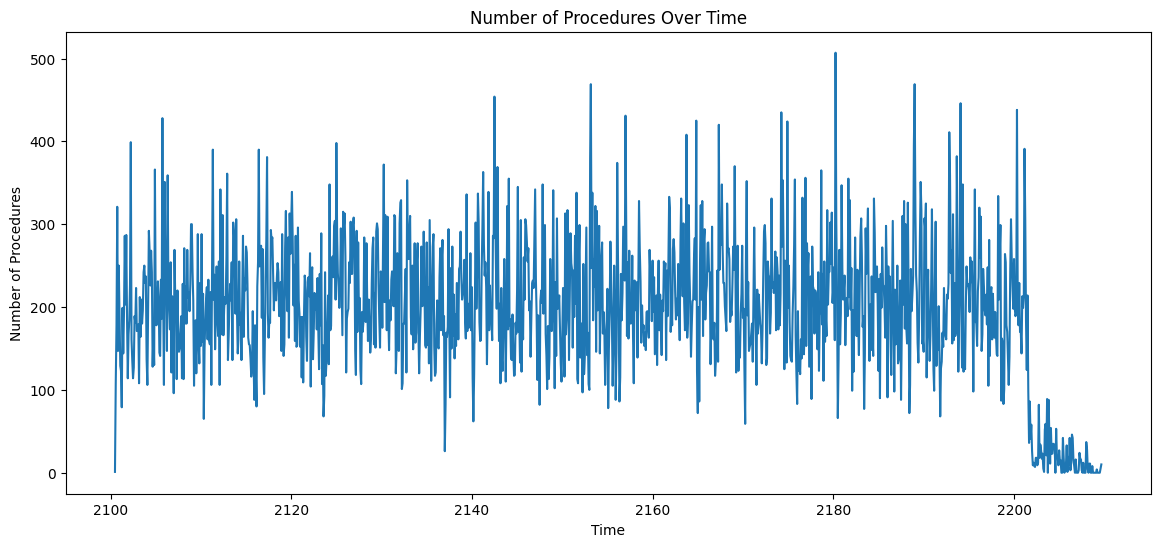

In [8]:
# Convert time columns to datetime
procedureevents_mv['STARTTIME'] = pd.to_datetime(procedureevents_mv['STARTTIME'])

# Count procedures over time
procedures_over_time = procedureevents_mv.set_index('STARTTIME').resample('M').size()

plt.figure(figsize=(14, 6))
sns.lineplot(data=procedures_over_time)
plt.title('Number of Procedures Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Procedures')
plt.show()

In [3]:
# Download the SERVICES csv file
csv_file_path = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/SERVICES.csv'

# Load the downloaded file into a pandas DataFrame
services = pd.read_csv(csv_file_path)

In [10]:
services.head()

,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,NaN,CMED
3,761,473,129194,2201-01-09 20:16:45,NaN,NB
4,762,474,194246,2181-03-23 08:24:41,NaN,NB


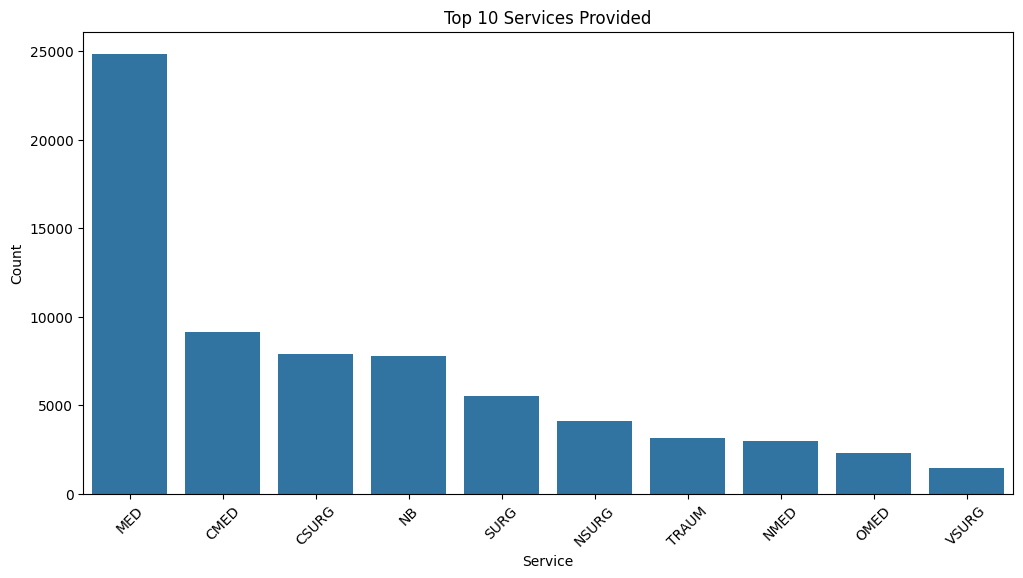

In [4]:
# Count the number of occurrences of each service
service_counts = services['CURR_SERVICE'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=service_counts.index, y=service_counts.values)
plt.title('Top 10 Services Provided')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

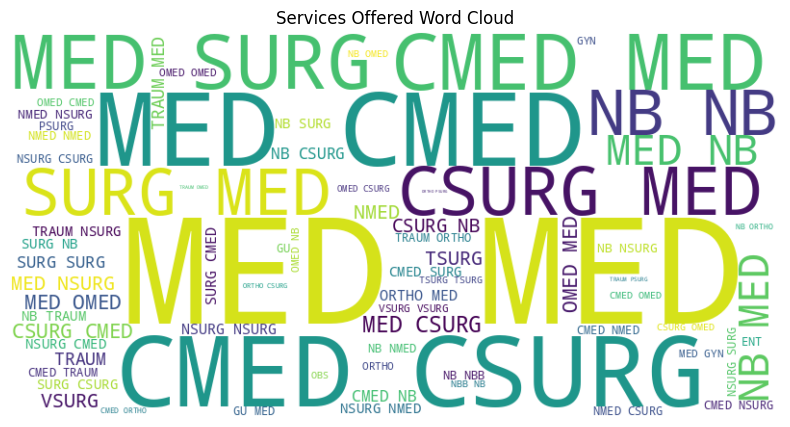

In [5]:
from wordcloud import WordCloud

# Combine the organism and interpretation columns to form the text data for the word cloud
text_data = services['CURR_SERVICE'].dropna().tolist()

# Join all text data into a single string
text = ' '.join(text_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Services Offered Word Cloud')
plt.show()

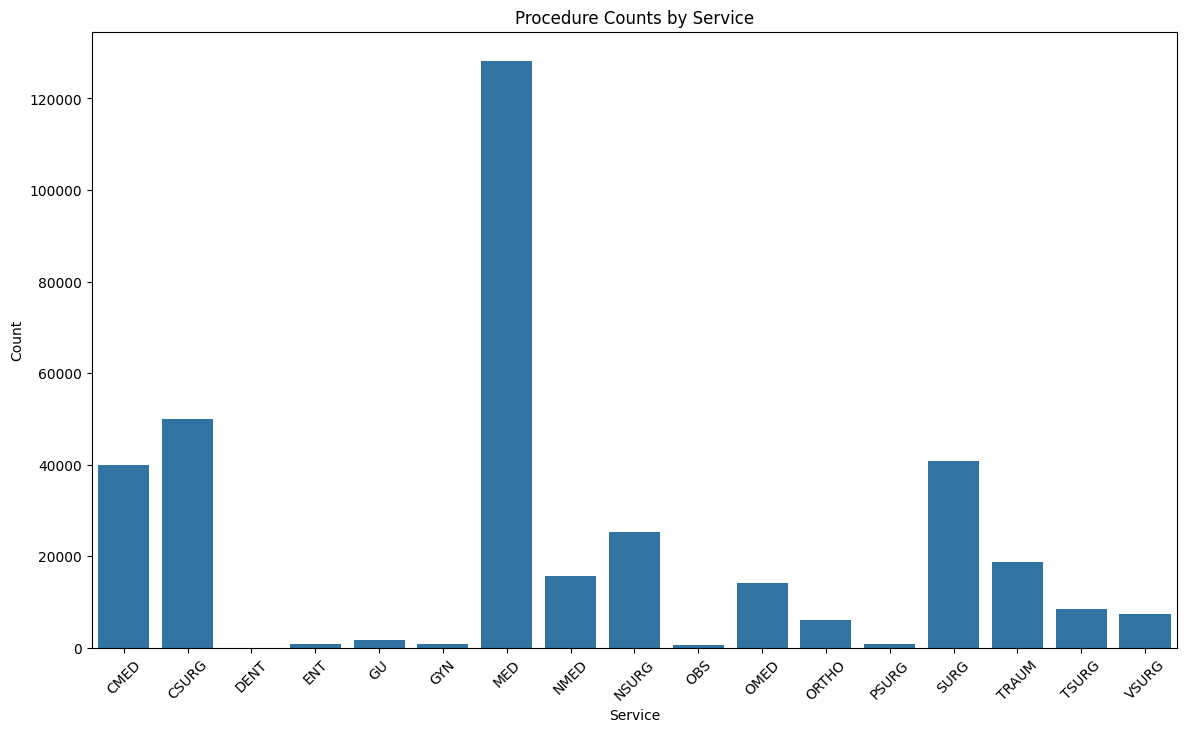

In [9]:
# Merge procedureevents and services data
merged_data = pd.merge(procedureevents_mv, services, on='HADM_ID')

# Count the number of procedures per service
procedure_service_counts = merged_data.groupby('CURR_SERVICE').size().reset_index(name='COUNT')

# Plot the counts using a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='CURR_SERVICE', y='COUNT', data=procedure_service_counts)
plt.title('Procedure Counts by Service')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

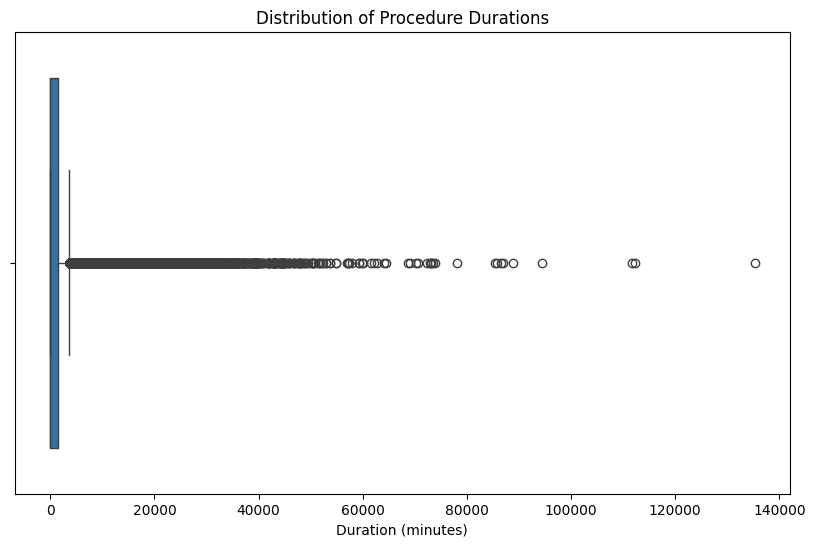

In [10]:
# Calculate procedure duration in minutes
procedureevents_mv['DURATION'] = (pd.to_datetime(procedureevents_mv['ENDTIME']) - pd.to_datetime(procedureevents_mv['STARTTIME'])).dt.total_seconds() / 60

plt.figure(figsize=(10, 6))
sns.boxplot(x='DURATION', data=procedureevents_mv)
plt.title('Distribution of Procedure Durations')
plt.xlabel('Duration (minutes)')
plt.show()

In [11]:
# Download the file to your local machine
csv_file_path = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/PRESCRIPTIONS.csv'

# Load the downloaded file into a pandas DataFrame
prescriptions = pd.read_csv(csv_file_path, low_memory=False)


In [ ]:
prescriptions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


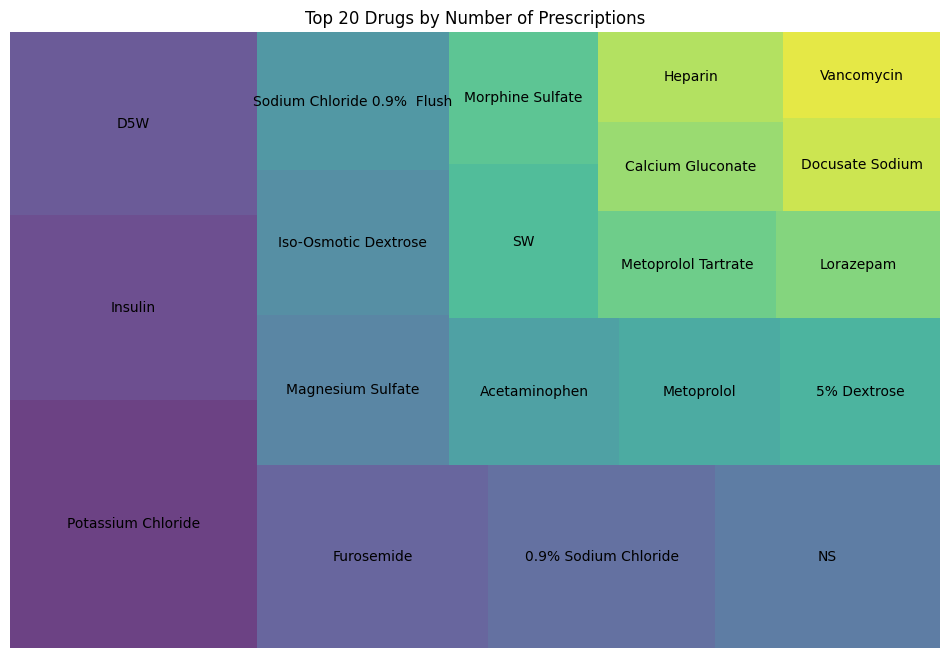

In [30]:
# Count the number of prescriptions for each drug
top_20_drugs = prescriptions['DRUG'].value_counts().head(20)

plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_20_drugs.values, label=top_20_drugs.index, alpha=.8, color=sns.color_palette('viridis', 20)) # Changed top_20_drugs['Prescription_Count'] to top_20_drugs.values and top_20_drugs['Drug'] to top_20_drugs.index
plt.title('Top 20 Drugs by Number of Prescriptions')
plt.axis('off')
plt.show()

In [31]:
# Download the file to your local machine
csv_file_path = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/TRANSFERS.csv'

# Load the downloaded file into a pandas DataFrame
transfers = pd.read_csv(csv_file_path)

In [ ]:
transfers.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,EVENTTYPE,PREV_CAREUNIT,CURR_CAREUNIT,PREV_WARDID,CURR_WARDID,INTIME,OUTTIME,LOS
0,657,111,192123,254245.0,carevue,transfer,CCU,MICU,7.0,23.0,2142-04-29 15:27:11,2142-05-04 20:38:33,125.19
1,658,111,192123,NaN,carevue,transfer,MICU,NaN,23.0,45.0,2142-05-04 20:38:33,2142-05-05 11:46:32,15.13
2,659,111,192123,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2142-05-05 11:46:32,NaN,NaN
3,660,111,155897,249202.0,metavision,admit,NaN,MICU,NaN,52.0,2144-07-01 04:13:59,2144-07-01 05:19:39,1.09
4,661,111,155897,NaN,metavision,transfer,MICU,NaN,52.0,32.0,2144-07-01 05:19:39,2144-07-01 06:28:29,1.15


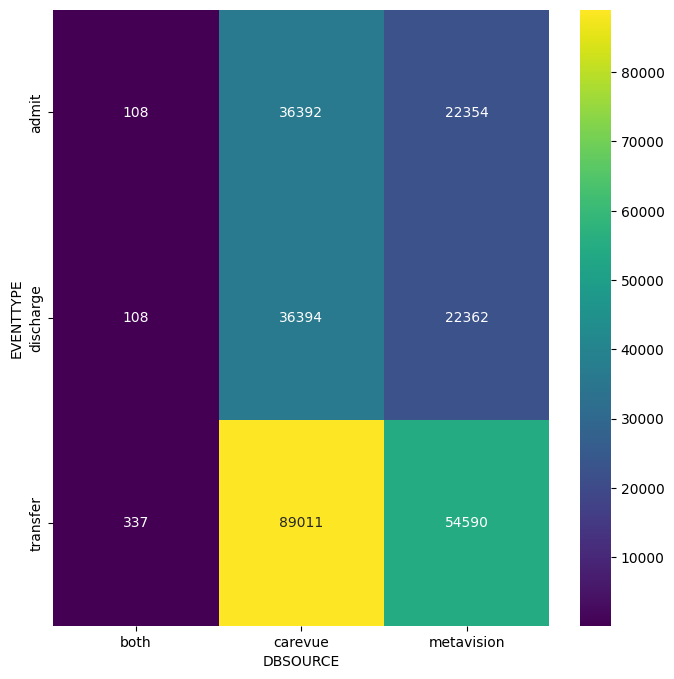

In [32]:
plt.subplots(figsize=(8, 8))

# Replace 'df' with the actual name of your DataFrame
df_2dhist = pd.DataFrame({
    db_source: grp['EVENTTYPE'].value_counts(dropna=False).sort_index() # Ensure consistent order of EVENTTYPEs
    for db_source, grp in transfers.groupby('DBSOURCE')
})

# Fill NaN values with 0 for better visualization
df_2dhist.fillna(0, inplace=True)

sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='g')
plt.xlabel('DBSOURCE')
plt.ylabel('EVENTTYPE')
plt.show()

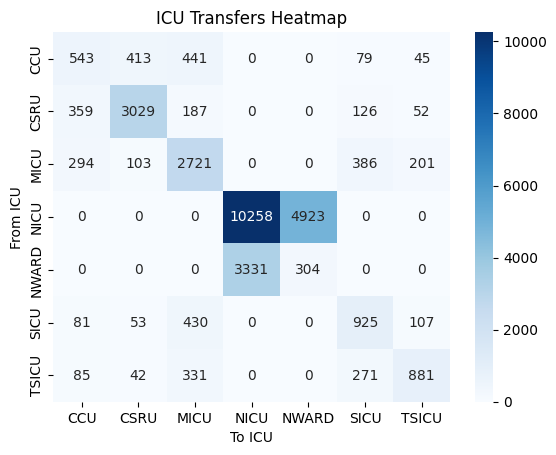

In [ ]:
# Sort transfers DataFrame by SUBJECT_ID, HADM_ID, and INTIME
transfers_sorted = transfers.sort_values(['SUBJECT_ID', 'HADM_ID', 'INTIME'])

# Create a shifted column for the next care unit
transfers_sorted['next_careunit'] = transfers_sorted.groupby(['SUBJECT_ID', 'HADM_ID'])['CURR_CAREUNIT'].shift(-1)

# Remove transfers where next_careunit is NaN (last ICU stay within an admission)
transfers_filtered = transfers_sorted.dropna(subset=['next_careunit'])

# Aggregate ICU transfers
transfers_agg = transfers_filtered.groupby(['CURR_CAREUNIT', 'next_careunit'])['CURR_CAREUNIT'].count().reset_index(name='count')

# Pivot data for heatmap
heatmap_data = transfers_agg.pivot_table(index='CURR_CAREUNIT', columns='next_careunit', values='count')

# Replace infinite values with 0
heatmap_data.replace([np.inf, -np.inf], 0, inplace=True)

# Fill NaN values with 0
heatmap_data.fillna(0, inplace=True)

# Convert heatmap data to integers
heatmap_data = heatmap_data.astype(int)

# Plot heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.xlabel('To ICU')
plt.ylabel('From ICU')
plt.title('ICU Transfers Heatmap')
plt.show()

In [ ]:
import json

# Filter for ICU transfers
icu_transfers = transfers[(transfers['PREV_CAREUNIT'].notna()) & (transfers['CURR_CAREUNIT'].notna())]

# Aggregate the transfer data
transfer_counts = icu_transfers.groupby(['PREV_CAREUNIT', 'CURR_CAREUNIT']).size().reset_index(name='count')

# Save the data for D3.js
transfer_counts.to_csv('/content/drive/My Drive/Deep Learning/mimic-iii-dataset/transfer_counts.csv', index=False)

# Convert the aggregated data to the required format
nodes = list(set(transfer_counts['PREV_CAREUNIT']).union(set(transfer_counts['CURR_CAREUNIT'])))
node_map = {node: index for index, node in enumerate(nodes)}

links = [
    {"source": node_map[row['PREV_CAREUNIT']], "target": node_map[row['CURR_CAREUNIT']], "value": row['count']}
    for _, row in transfer_counts.iterrows()
]

data = {
    "nodes": [{"name": node} for node in nodes],
    "links": links
}

# Save the data to a JSON file
with open('/content/drive/My Drive/Deep Learning/mimic-iii-dataset/sankey_data.json', 'w') as f:
    json.dump(data, f)



In [ ]:
# Download the file
csv_file_path = '/content/drive/My Drive/Deep Learning/mimic-iii-dataset/LABEVENTS.csv'

# Load the downloaded file into a pandas DataFrame
labevents = pd.read_csv(csv_file_path)


In [ ]:
labevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal


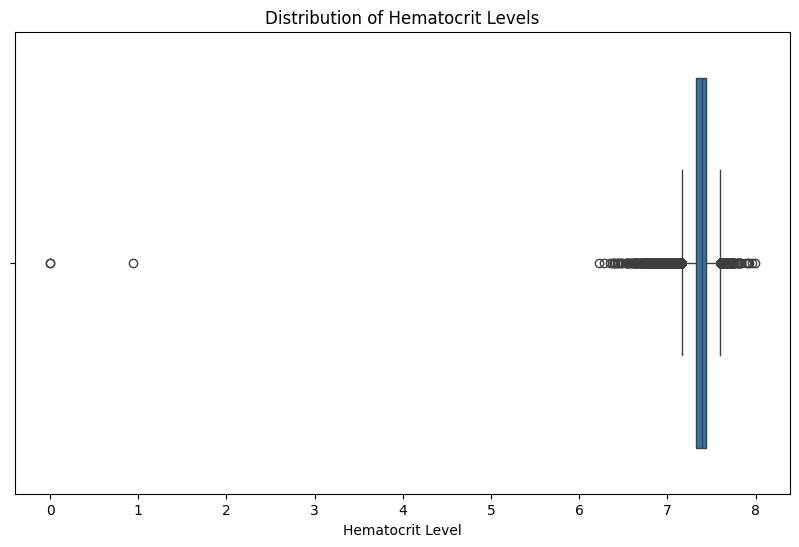

In [ ]:
# Filter for a specific lab test
lab_test_data = labevents[labevents['ITEMID'] == 50820]  # ITEMID for a specific lab test (e.g., Hematocrit)

plt.figure(figsize=(10, 6))
sns.boxplot(x='VALUENUM', data=lab_test_data)
plt.title('Distribution of Hematocrit Levels')
plt.xlabel('Hematocrit Level')
plt.show()